# State COVID Data Visualizations

In this notebook, we will do some data visualizations of state COVID data in the United States.

In [1]:
# Import libraries
import src.visualizations.format_data as f_data
import src.visualizations.gen_visualizations as visual
import src.visualizations.mask_mandate_visualizations as mask_visual

from src.visualizations.format_data import state_abbrev_only, us_state_abbrev
import importlib 
importlib.reload(f_data)
importlib.reload(mask_visual)
importlib.reload(visual)

# Basic Library Imports
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import DataFrame


### Data

We will use data from John Hopkins University and the COVID Tracking Project for the following visualizations. The Hopkins data contains the number of confirmed cases and deaths in the US, and the Tracking Project data contains hospital data for each state.

In [2]:
us_state_abbrev

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin':

In [3]:
paths = ['data/raw/US/time_series_covid19_confirmed_US.csv',
         'data/raw/US/time_series_covid19_deaths_US.csv']

states_confirmed, states_deaths, state_population = f_data.import_jhu_data(paths[1], paths[0])


In [4]:
hospital_paths = ['data/raw/Hospital_Data/national-history.csv', 
                  'data/raw/Hospital_Data/all-states-history.csv']
us_hospital_data, hospital_data = f_data.import_hospital_data(hospital_paths[0], hospital_paths[1], states_confirmed.columns)

Lets look at the features of the hospital data to get a sense of the variables tracked.

In [5]:
# Since the data is a time series, the features were moved from the columns to the index for ease of use
us_hospital_data.index

Index(['date', 'death', 'deathIncrease', 'inIcuCumulative', 'inIcuCurrently',
       'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'posNeg', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

### General Trends

Lets look at the number of daily cases and the positivity rate in the US. A 7 Day Rolling Average was used in the following graphs.

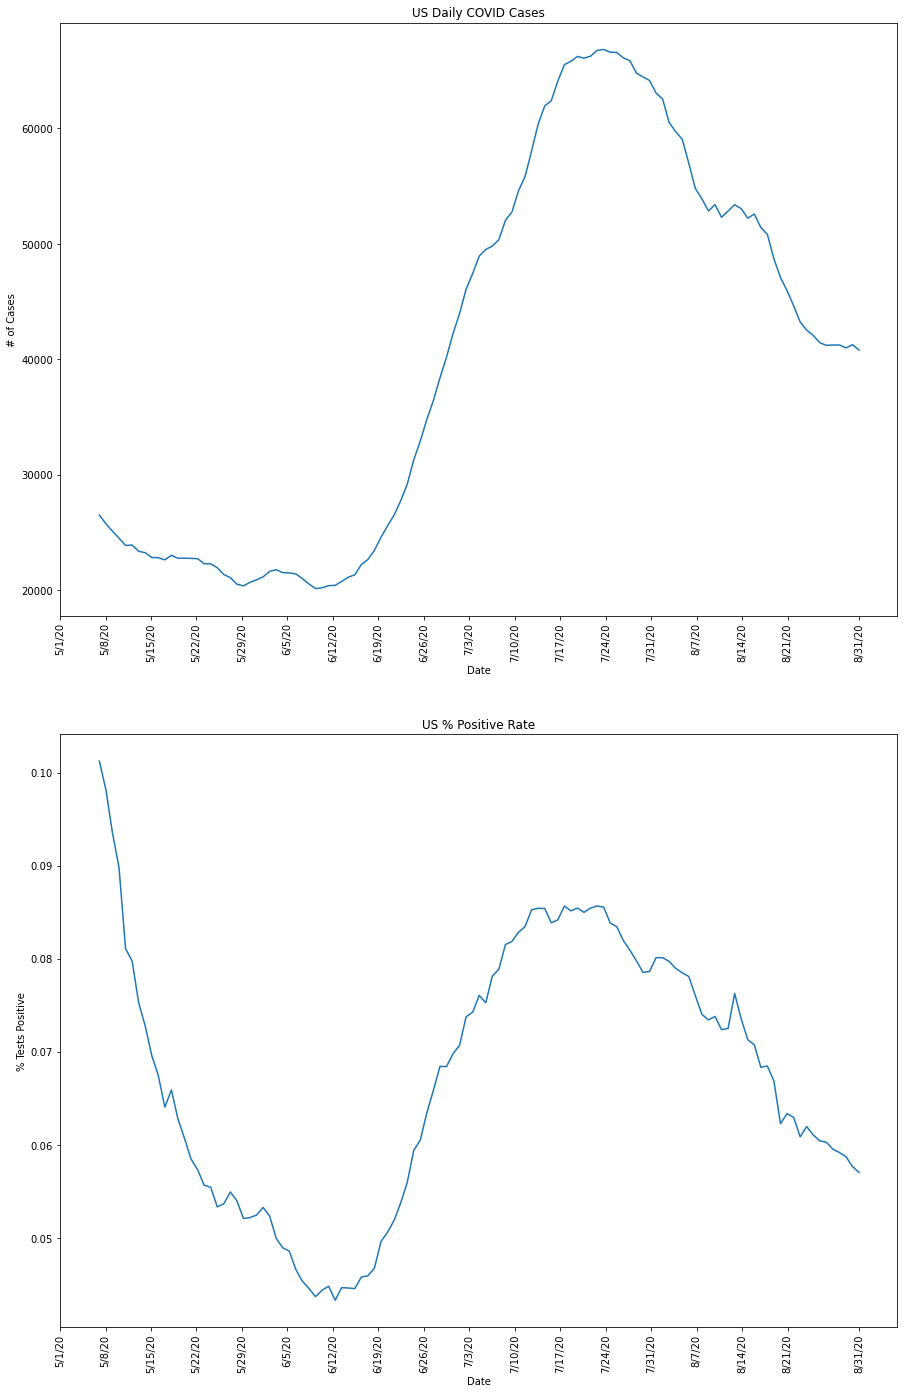

In [6]:
fig, ax = visual.gen_us_trends(us_hospital_data)

The graphs above show a rapid increase in both cases and positivity rate starting in the middle of June, peaking in late July, then declining afterwards.

To get more information about COVID trends for individual states, lets look at cases and positivity rates in individual states.

In [7]:
state_df, pos_df = visual.gen_state_trends(hospital_data, state_abbrev_only)

The following is a heat map that shows the Weekly % Change of Case and Positivity Rate Trends for US States.

In [8]:
fig, fig2 = visual.state_heat_map(state_df, pos_df)
fig.show()
fig2.show()

[add analysis here]

[come up with reason to analyze masks based on general trends]

### Mask Mandates

Lets start by finding when mask mandates were implemented for each state. 

Note: This list was last updated August 4th.

In [9]:
state_mask_mandates = mask_visual.mask_mandate_dates(us_state_abbrev)
state_mask_mandates

{'Alabama': '7/16/20',
 'Alaska': None,
 'Arizona': None,
 'Arkansas': '7/20/20',
 'California': '6/18/20',
 'Colorado': '7/17/20',
 'Connecticut': '4/20/20',
 'Delaware': '4/28/20',
 'District of Columbia': '5/16/20',
 'Florida': None,
 'Georgia': None,
 'Hawaii': '4/20/20',
 'Idaho': None,
 'Illinois': '5/1/20',
 'Indiana': '7/27/20',
 'Iowa': None,
 'Kansas': '7/3/20',
 'Kentucky': '5/11/20',
 'Louisiana': '7/13/20',
 'Maine': '5/1/20',
 'Maryland': '4/18/20',
 'Massachusetts': '5/6/20',
 'Michigan': '6/18/20',
 'Minnesota': '7/25/20',
 'Mississippi': '8/4/20',
 'Missouri': None,
 'Montana': '7/16/20',
 'Nebraska': None,
 'Nevada': '6/24/20',
 'New Hampshire': '8/11/20',
 'New Jersey': '4/8/20',
 'New Mexico': '5/16/20',
 'New York': '4/17/20',
 'North Carolina': '6/26/20',
 'North Dakota': None,
 'Ohio': '7/23/20',
 'Oklahoma': None,
 'Oregon': '7/1/20',
 'Pennsylvania': '4/19/20',
 'Puerto Rico': '4/30/20',
 'Rhode Island': '5/8/20',
 'South Carolina': None,
 'South Dakota': None,

Now, lets group states by the month that they implemented mask mandates and graph them together to see if we can find any similar trends.

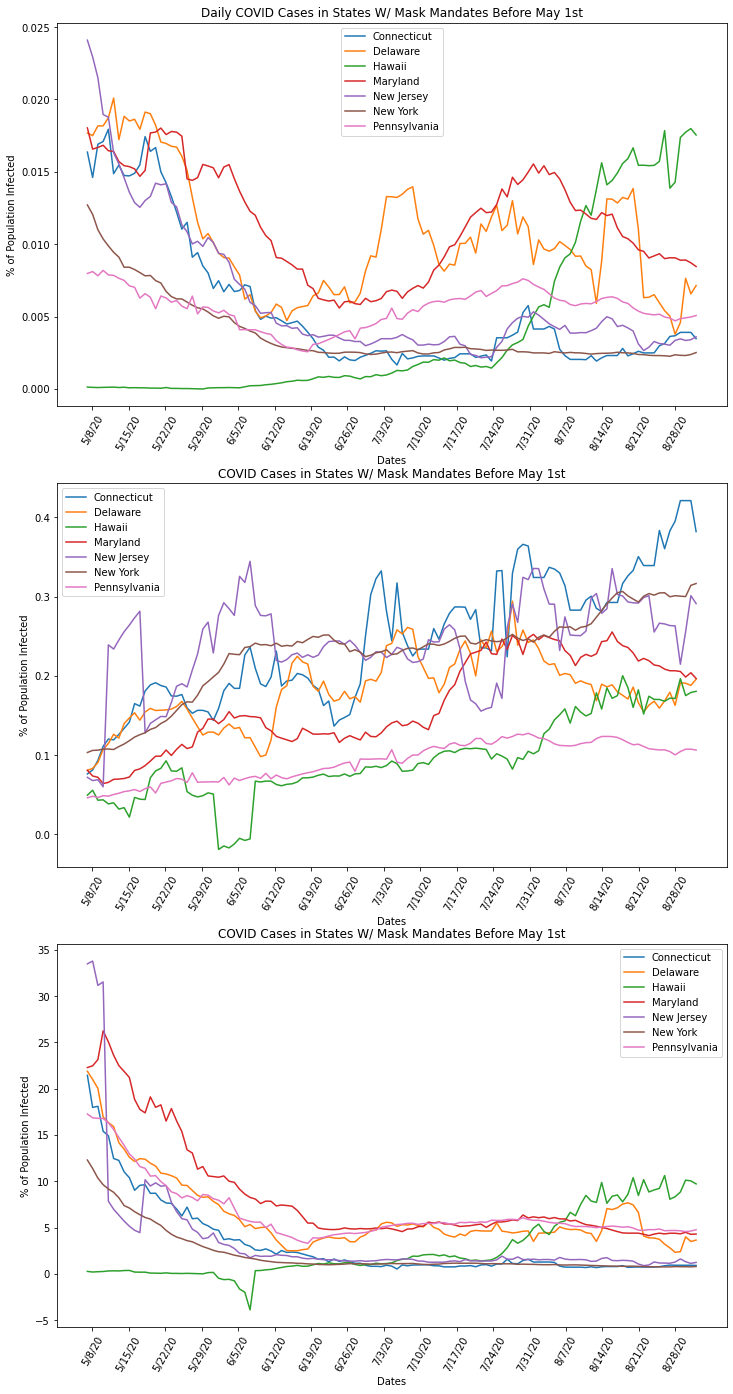

In [10]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] <= '4']
states.remove('Puerto Rico')

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Before May 1st')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('COVID Cases in States W/ Mask Mandates Before May 1st')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

ax = fig.add_subplot(313)
ax.set_title('COVID Cases in States W/ Mask Mandates Before May 1st')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

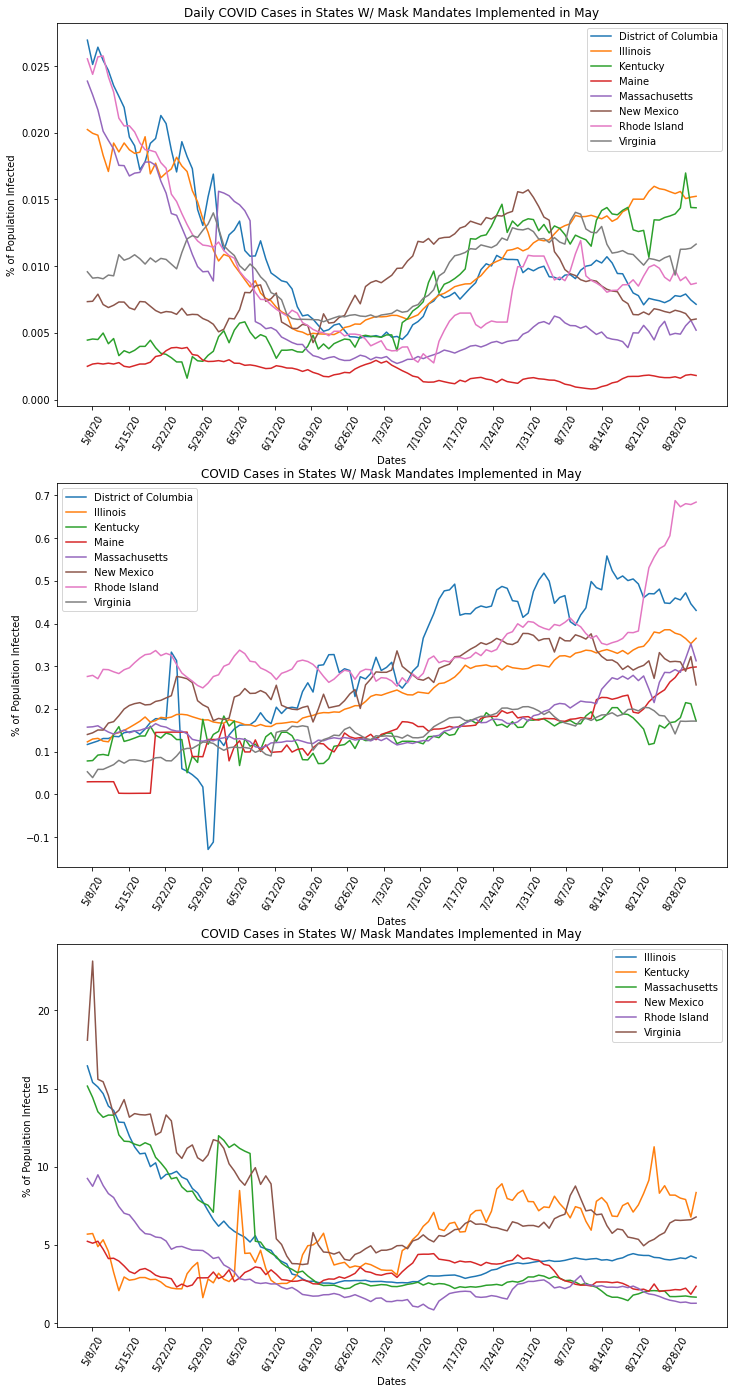

In [11]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '5']

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in May')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('COVID Cases in States W/ Mask Mandates Implemented in May')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

states.remove('District of Columbia')
states.remove('Maine')

ax = fig.add_subplot(313)
ax.set_title('COVID Cases in States W/ Mask Mandates Implemented in May')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

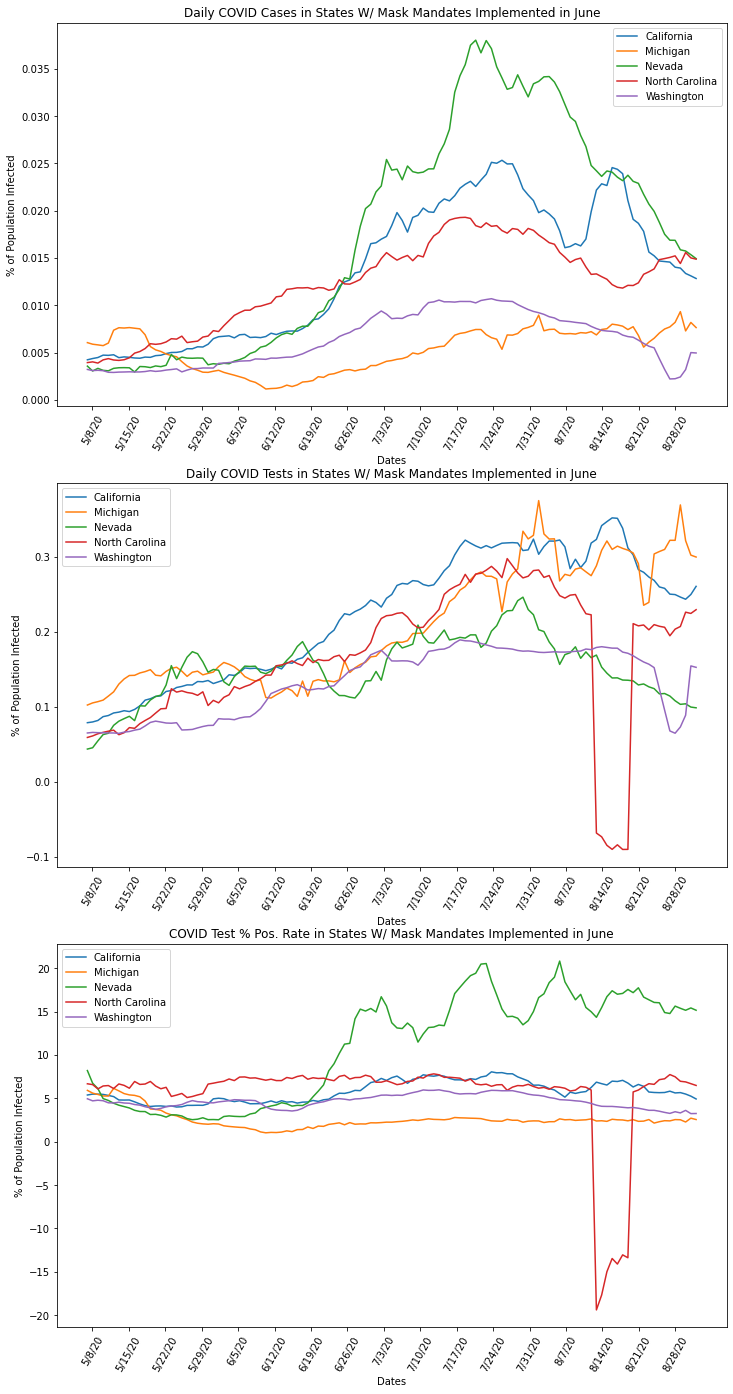

In [12]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '6']

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in June')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('Daily COVID Tests in States W/ Mask Mandates Implemented in June')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

ax = fig.add_subplot(313)
ax.set_title('COVID Test % Pos. Rate in States W/ Mask Mandates Implemented in June')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

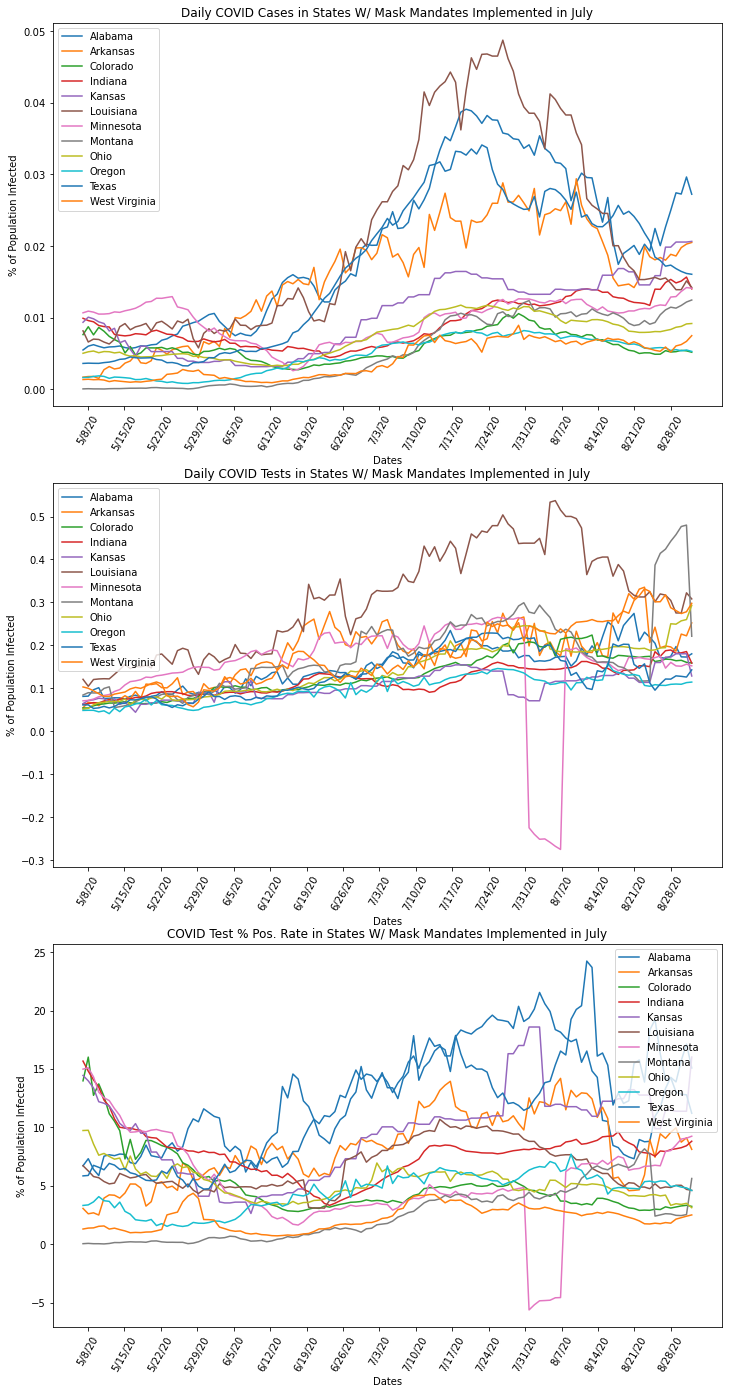

In [13]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '7']

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in July')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('Daily COVID Tests in States W/ Mask Mandates Implemented in July')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

ax = fig.add_subplot(313)
ax.set_title('COVID Test % Pos. Rate in States W/ Mask Mandates Implemented in July')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

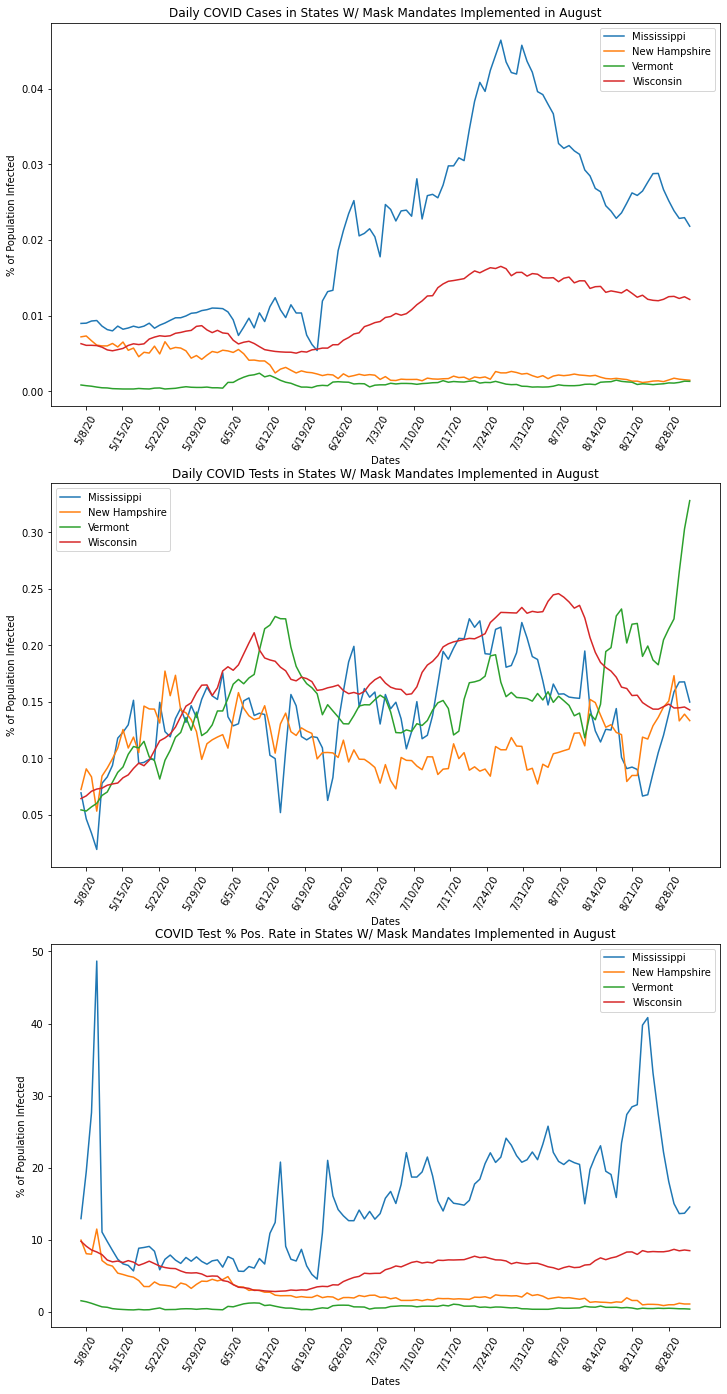

In [14]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] != None and state_mask_mandates[state][0] == '8']

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ Mask Mandates Implemented in August')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('Daily COVID Tests in States W/ Mask Mandates Implemented in August')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

ax = fig.add_subplot(313)
ax.set_title('COVID Test % Pos. Rate in States W/ Mask Mandates Implemented in August')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

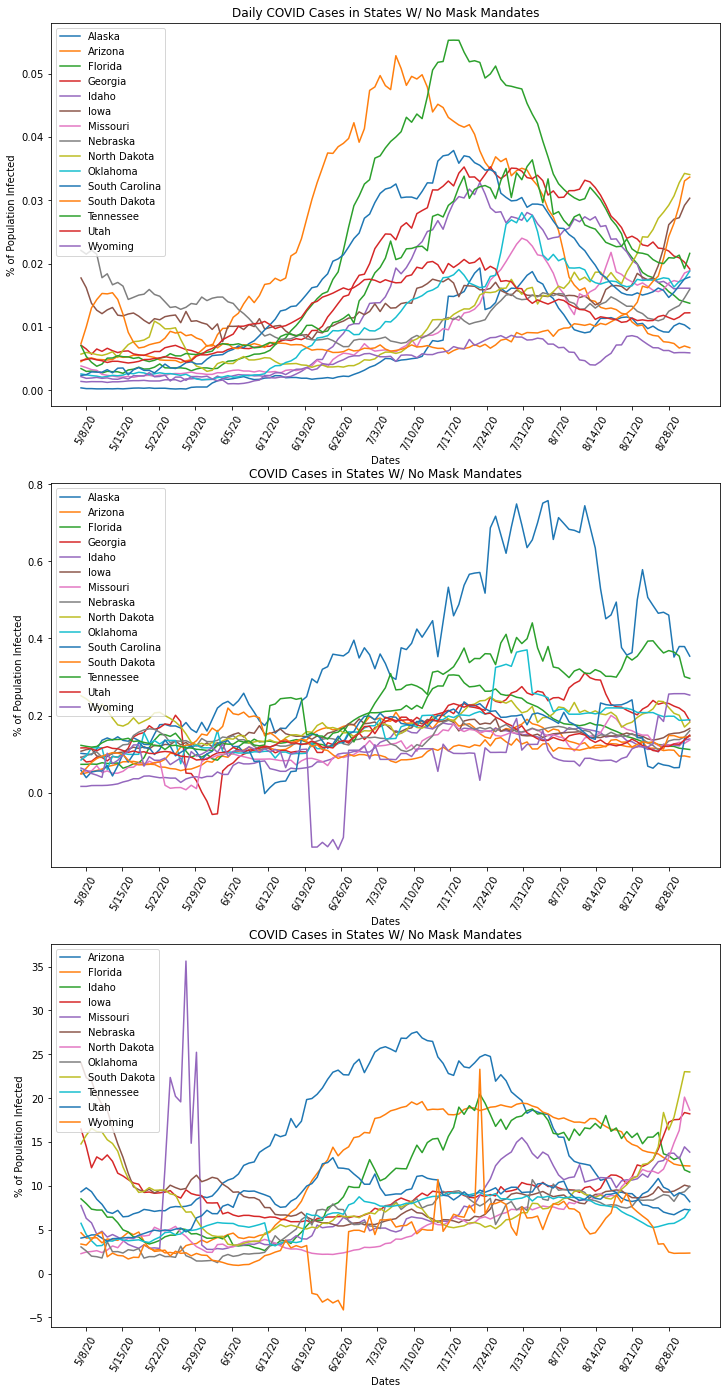

In [15]:
states = [state for state in state_mask_mandates.keys() if state_mask_mandates[state] == None]

fig = plt.figure(figsize = (12, 24))

ax = fig.add_subplot(311)
ax.set_title('Daily COVID Cases in States W/ No Mask Mandates')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'positive', states, state_population)

ax = fig.add_subplot(312)
ax.set_title('COVID Cases in States W/ No Mask Mandates')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'totalIncr', states, state_population)

states.remove('Georgia')
states.remove('Alaska')
states.remove('South Carolina')

ax = fig.add_subplot(313)
ax.set_title('COVID Cases in States W/ No Mask Mandates')
ax.set_ylabel('% of Population Infected')
ax.set_xlabel('Dates')
ax = mask_visual.graph_ax(ax, hospital_data, 'percent_pos', states, state_population)

[some analysis]

Finally, lets see if there's a correlation between COVID case and positivity rate trends and mask mandate dates. We can do this by grouping the states by the month they passed a statewide mask mandate, taking the average of case and pos. rates for each state in each category, and graphing the results.

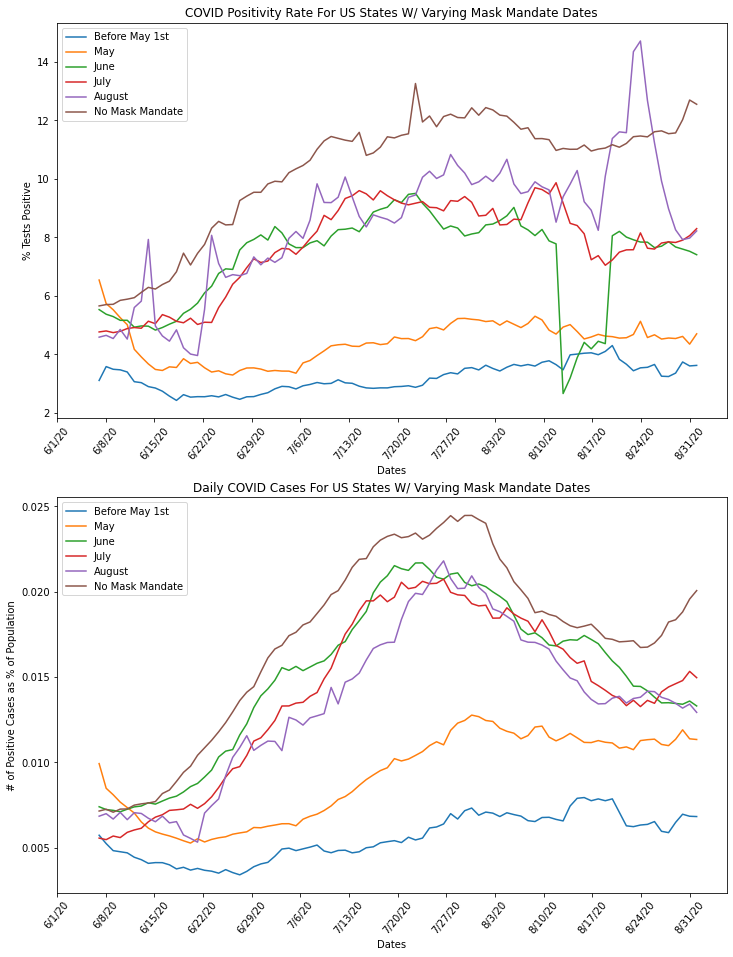

In [16]:
# States
early = ['Connecticut', 'Delaware', 'Hawaii', 'Maryland',
 'New Jersey', 'New York', 'Pennsylvania']

may = ['Illinois', 'Kentucky', 'Massachusetts',
 'New Mexico', 'Rhode Island', 'Virginia']

june = ['California', 'Michigan', 'Nevada', 'North Carolina', 'Washington']

july = ['Alabama', 'Arkansas', 'Colorado', 'Indiana', 'Kansas',
        'Louisiana', 'Minnesota', 'Montana', 'Ohio', 'Oregon', 
        'Texas', 'West Virginia']

august = ['Mississippi', 'New Hampshire', 'Vermont', 'Wisconsin']

no = ['Arizona', 'Florida', 'Idaho', 'Iowa', 'Missouri',
      'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
      'Tennessee', 'Utah', 'Wyoming']

state_masks = [early, may, june, july, august, no]


# Make Graph
fig = plt.figure(figsize = (12, 16))

# Pos. Rate
ax = fig.add_subplot(211)

ax.set_title('COVID Positivity Rate For US States W/ Varying Mask Mandate Dates')
ax.set_ylabel('% Tests Positive')
ax.set_xlabel('Dates')

ax = mask_visual.states_graph_ax(ax, hospital_data, 'pos_rate', state_masks, state_population)

# Daily Cases
ax = fig.add_subplot(212)

ax.set_title('Daily COVID Cases For US States W/ Varying Mask Mandate Dates')
ax.set_ylabel('# of Positive Cases as % of Population')
ax.set_xlabel('Dates')

ax = mask_visual.states_graph_ax(ax, hospital_data, 'cases', state_masks, state_population)

[some analysis here]